# Homework 3: Classification using sklearn  

The objective of this homework is to gain experience with using sklearn, a versatile Python toolbox for machine learning. The following code is copied from http://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html#sphx-glr-auto-examples-classification-plot-classifier-comparison-py. You should be able to run the code without error messages.

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


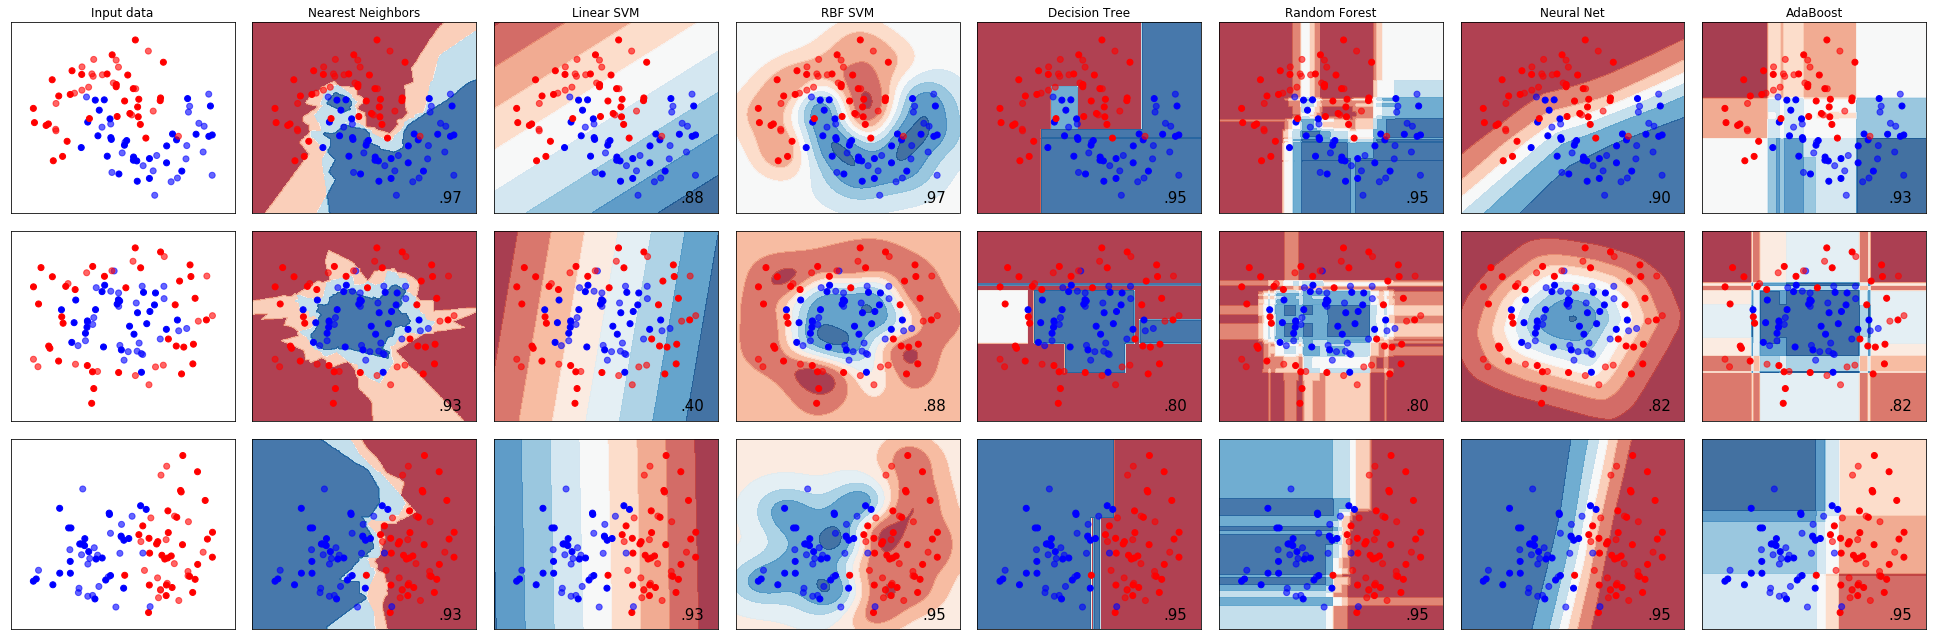

In [2]:
# Code source: Gaël Varoquaux
#              Andreas Müller
# Modified for documentation by Jaques Grobler
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"] #naming all the algorithms we will use and show them in the title

classifiers = [                       #this includes all algorithms we will use to train the data
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,
                           random_state=1, n_clusters_per_class=1)
rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),          #building three different dataset here
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable
            ]

figure = plt.figure(figsize=(27, 9))   #make figure size
i = 1
# iterate over datasets
for ds_cnt, ds in enumerate(datasets):
    # preprocess dataset, split into training and test part
    X, y = ds
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
        train_test_split(X, y, test_size=.4, random_state=42)  #split dataset for both training and testing later on

    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # just plot the dataset first
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data")
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1

    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
                size=15, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

The code above trained several types of classifiers on 3 synthetic data sets. Among them are kNN and feedforward neural networks. There are also some other algorithms we will introduce during the course. At the moment, you do not have to worry what they are and how they work. 

**Question 1**. Study the code and try to understand what each line does. In particular, pay attention to how easy it is to train predictors of different types. Run the code. You should be able to see a nice display demonstrating performance of different algorithms on 3 data sets.

**Question 2**. Train all the listed classifiers on Iris data (you can load it using *iris = sklearn.datasets.load_iris()*) and test their accuracy. Report and discuss the results

**Question 3**. Play with the hyperparameters of each of the algorithms. Try to improve the accuracy on the test data. 

**Question 4**. Perform the exploratory data analysis of  the Adult Data Set from http://archive.ics.uci.edu/ml/datasets/Adult. Train and estimate accuracy of all of all the classifiers from Question 1. Note that you will have to preprocess your data set before training. Explain all the preprocessing steps you applied and report on the accuracy on test data. Report all EDA and classification results in a 1-page document.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\cbook\deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: Convergen

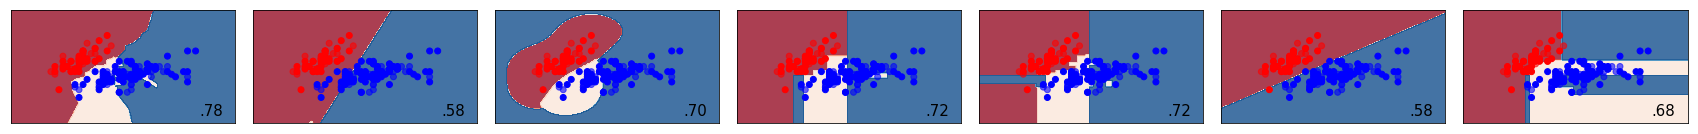

In [3]:
#This is just a test and my ansewer to question 2 is after this part
from sklearn import datasets
iris = datasets.load_iris()   
datasets=iris

h = .02  # step size in the mesh

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", 
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost"] #naming all the algorithms we will use and show them in the title

classifiers = [                       #this includes all algorithms we will use to train the data
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
#    GaussianProcessClassifier(1.0 * RBF(1.0), warm_start=True),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1),
    AdaBoostClassifier()]
#    GaussianNB(),
#    QuadraticDiscriminantAnalysis()]

from sklearn.cross_validation import train_test_split
figure = plt.figure(figsize=(27, 9))
i = 1
# iterate over datasets
X = datasets.data[:, [0,1]]  
y = datasets.target
X_train, X_test, y_train, y_test = train_test_split(
X, y, test_size=0.33)
   

x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

    # just plot the dataset first
cm = plt.cm.RdBu
cm_bright = ListedColormap(['#FF0000', '#0000FF'])
ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
   

    # iterate over classifiers
for name, clf in zip(names, classifiers):
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    clf.fit(X_train, y_train)
    score = clf.score(X_test, y_test)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)

        # Plot also the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
        # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,
                   alpha=0.6)

    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    if ds_cnt == 0:
        ax.set_title(name)
    ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),
            size=15, horizontalalignment='right')
    i += 1

plt.tight_layout()
plt.show()

In [3]:
#Question2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X = iris.data[:, [0,3]]  # we only take the first two features. We could
y = iris.target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [4]:
def accuracy_score(truth, pred):
    if len(truth) == len(pred): 
        return "Total predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"

In [5]:
k=3
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (" (K=",k,")",accuracy_score(predictions, y_test))

 (K= 3 ) Total predictions have an accuracy of 96.00%.


In [8]:
predictor =  SVC(kernel="linear", C=0.025)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 92.50%.


In [9]:
predictor =  SVC(gamma=2, C=1)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 95.00%.


In [10]:
predictor =  DecisionTreeClassifier(max_depth=5)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 92.50%.


In [11]:
predictor = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 92.50%.


In [12]:
predictor =   MLPClassifier(alpha=1)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 95.00%.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [13]:
predictor =  AdaBoostClassifier()
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))
    

Total predictions have an accuracy of 95.00%.


In [ ]:
#KNN has the highest accuarcy 96%, while other classifiers have pretty high accuarcy too.

In [23]:
#Question3
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
iris = datasets.load_iris()
X = iris.data[:, [0,3]]  # we only take the first two features. We could
y = iris.target
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33)
def accuracy_score(truth, pred):
    if len(truth) == len(pred): 
        return "Total predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
k=9
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (" (K=",k,")",accuracy_score(predictions, y_test))
''When K=9,the accuracy score is the highest, which is 98%''

 (K= 9 ) Total predictions have an accuracy of 98.00%.


In [38]:
predictor =  SVC(kernel="linear", C=0.2)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))
"""When C=0.2,the accuracy score is the highest, which is 98%"""

Total predictions have an accuracy of 98.00%.


In [45]:
predictor =  SVC(gamma=6, C=1.5)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))
"""When gamma=6, C=1.5,the accuracy score is the highest, which is 98%"""

Total predictions have an accuracy of 98.00%.


In [59]:
predictor =  DecisionTreeClassifier(max_depth=3)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))
"""When max_depth=3,the accuracy score is the highest, which is 96%"""

Total predictions have an accuracy of 96.00%.


In [79]:
predictor = RandomForestClassifier(max_depth=1, n_estimators=15, max_features=2)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))
""When max_depth=1, n_estimators=15, max_features=2,the accuracy score is the highest, which is 96%"""

Total predictions have an accuracy of 96.00%.


In [105]:
predictor =   MLPClassifier(alpha=0.6)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))
"""When alpha=0.6, the accuracy score is the highest, which is 96%"""

Total predictions have an accuracy of 96.00%.


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
#Question 4
'''Question 4
The preprocessing steps I applied:
    1.Add column name to adult.data
    2.Replace all "?" to None
    3.Create dummy variables for all category variables
    4.pop "earning" column to treat it as y_test,y_train;treat the rest column x_test,x_train
    5.Then calculate accuracy'''

In [16]:
import pandas as pd
df=pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data",delimiter=',' ,names = ["Age", "Work_Class", "fnlwgt", "Education_Level","Education_Grade", "Marital_Status", "Occupation", "Relationship","Race", "sex", "Capital_Gain", "Capital_Loss","Hours/week","Origin_Country","Earnings"])

In [24]:
df.to_csv('df.csv')

In [5]:
import pandas as pd
df=pd.read_excel('adult_data.xlsx')
df.head()

,Age,Work_Class,fnlwgt,Education_Level,Education_Grade,Marital_Status,Occupation,Relationship,Race,sex,Capital_Gain,Capital_Loss,Hours/week,Origin_Country,Earnings
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [22]:
df = df[df.Origin_Country != 'Holand-Netherlands']

In [144]:
import numpy as np
import matplotlib.pyplot as plt
# the following line allows ipython to display plots
%matplotlib inline
print (df.describe())
print(df.dtypes)

                Age        fnlwgt  Education_Grade  Capital_Gain  \
count  32561.000000  3.256100e+04     32561.000000  32561.000000   
mean      38.581647  1.897784e+05        10.080679   1077.648844   
std       13.640433  1.055500e+05         2.572720   7385.292085   
min       17.000000  1.228500e+04         1.000000      0.000000   
25%       28.000000  1.178270e+05         9.000000      0.000000   
50%       37.000000  1.783560e+05        10.000000      0.000000   
75%       48.000000  2.370510e+05        12.000000      0.000000   
max       90.000000  1.484705e+06        16.000000  99999.000000   

       Capital_Loss    Hours/week  
count  32561.000000  32561.000000  
mean      87.303830     40.437456  
std      402.960219     12.347429  
min        0.000000      1.000000  
25%        0.000000     40.000000  
50%        0.000000     40.000000  
75%        0.000000     45.000000  
max     4356.000000     99.000000  
Age                 int64
Work_Class         object
fnlwgt     

In [26]:
#df.replace({'?': None})
pt=pd.crosstab([df.Origin_Country],[df.Earnings],margins=True)
df["Origin_Country"].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [162]:
df["Age"].value_counts()[:10]

36    898
31    888
34    886
23    877
35    876
33    875
28    867
30    861
37    858
25    841
Name: Age, dtype: int64

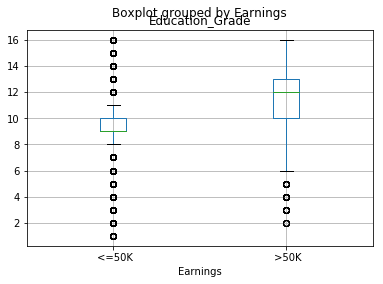

In [163]:
df.boxplot(column='Education_Grade',by='Earnings')

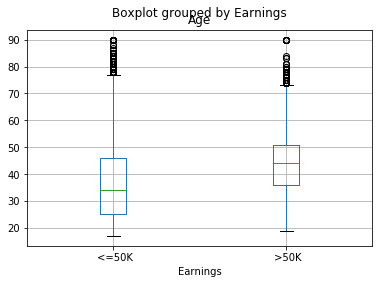

In [164]:
df.boxplot(column='Age',by='Earnings')

In [10]:
df_test=pd.read_table("http://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.test",delimiter=',' ,names = ["Age", "Work_Class", "fnlwgt", "Education_Level","Education_Grade", "Marital_Status", "Occupation", "Relationship","Race", "sex", "Capital_Gain", "Capital_Loss","Hours/week","Origin_Country","Earnings"])
df_test=df_test.drop([0])
df_test.head()

,Age,Work_Class,fnlwgt,Education_Level,Education_Grade,Marital_Status,Occupation,Relationship,Race,sex,Capital_Gain,Capital_Loss,Hours/week,Origin_Country,Earnings
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K.
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K.
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K.
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K.
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K.


In [6]:
dummy=pd.get_dummies(df[['sex',"Education_Level","Work_Class","Marital_Status","Occupation","Relationship","Race","Origin_Country"]])

In [7]:
df_new=pd.concat([df,dummy],axis=1)
df_new.head()

,Age,Work_Class,fnlwgt,Education_Level,Education_Grade,Marital_Status,Occupation,Relationship,Race,sex,...,Origin_Country_ Portugal,Origin_Country_ Puerto-Rico,Origin_Country_ Scotland,Origin_Country_ South,Origin_Country_ Taiwan,Origin_Country_ Thailand,Origin_Country_ Trinadad&Tobago,Origin_Country_ United-States,Origin_Country_ Vietnam,Origin_Country_ Yugoslavia
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,...,0,0,0,0,0,0,0,1,0,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,...,0,0,0,0,0,0,0,1,0,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,...,0,0,0,0,0,0,0,1,0,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,...,0,0,0,0,0,0,0,0,0,0


In [8]:
df_new2=df_new.drop(['sex',"Education_Level","Work_Class","Marital_Status","Occupation","Relationship","Race","Origin_Country"], axis=1)
df_new2.head()

,Age,fnlwgt,Education_Grade,Capital_Gain,Capital_Loss,Hours/week,Earnings,sex_ Female,sex_ Male,Education_Level_ 10th,...,Origin_Country_ Portugal,Origin_Country_ Puerto-Rico,Origin_Country_ Scotland,Origin_Country_ South,Origin_Country_ Taiwan,Origin_Country_ Thailand,Origin_Country_ Trinadad&Tobago,Origin_Country_ United-States,Origin_Country_ Vietnam,Origin_Country_ Yugoslavia
0,39,77516,13,2174,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [9]:
df3=df_new2.drop("Earnings",axis=1)
df3.head()

,Age,fnlwgt,Education_Grade,Capital_Gain,Capital_Loss,Hours/week,sex_ Female,sex_ Male,Education_Level_ 10th,Education_Level_ 11th,...,Origin_Country_ Portugal,Origin_Country_ Puerto-Rico,Origin_Country_ Scotland,Origin_Country_ South,Origin_Country_ Taiwan,Origin_Country_ Thailand,Origin_Country_ Trinadad&Tobago,Origin_Country_ United-States,Origin_Country_ Vietnam,Origin_Country_ Yugoslavia
0,39,77516,13,2174,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
1,50,83311,13,0,0,13,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,0,0,40,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,234721,7,0,0,40,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
4,28,338409,13,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [11]:
df_test['Earnings'] = df_test['Earnings'].str[:-1]
df_test.head()

,Age,Work_Class,fnlwgt,Education_Level,Education_Grade,Marital_Status,Occupation,Relationship,Race,sex,Capital_Gain,Capital_Loss,Hours/week,Origin_Country,Earnings
1,25,Private,226802.0,11th,7.0,Never-married,Machine-op-inspct,Own-child,Black,Male,0.0,0.0,40.0,United-States,<=50K
2,38,Private,89814.0,HS-grad,9.0,Married-civ-spouse,Farming-fishing,Husband,White,Male,0.0,0.0,50.0,United-States,<=50K
3,28,Local-gov,336951.0,Assoc-acdm,12.0,Married-civ-spouse,Protective-serv,Husband,White,Male,0.0,0.0,40.0,United-States,>50K
4,44,Private,160323.0,Some-college,10.0,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688.0,0.0,40.0,United-States,>50K
5,18,?,103497.0,Some-college,10.0,Never-married,?,Own-child,White,Female,0.0,0.0,30.0,United-States,<=50K


In [12]:
dummy=pd.get_dummies(df_test[['sex',"Education_Level","Work_Class","Marital_Status","Occupation","Relationship","Race","Origin_Country"]])
df_testNew=pd.concat([df_test,dummy],axis=1)


In [13]:
dummy.head()

,sex_ Female,sex_ Male,Education_Level_ 10th,Education_Level_ 11th,Education_Level_ 12th,Education_Level_ 1st-4th,Education_Level_ 5th-6th,Education_Level_ 7th-8th,Education_Level_ 9th,Education_Level_ Assoc-acdm,...,Origin_Country_ Portugal,Origin_Country_ Puerto-Rico,Origin_Country_ Scotland,Origin_Country_ South,Origin_Country_ Taiwan,Origin_Country_ Thailand,Origin_Country_ Trinadad&Tobago,Origin_Country_ United-States,Origin_Country_ Vietnam,Origin_Country_ Yugoslavia
1,0,1,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [14]:
df_testNew=df_testNew.drop(['sex',"Education_Level","Work_Class","Marital_Status","Occupation","Relationship","Race","Origin_Country"], axis=1)
df_testNew.head()

,Age,fnlwgt,Education_Grade,Capital_Gain,Capital_Loss,Hours/week,Earnings,sex_ Female,sex_ Male,Education_Level_ 10th,...,Origin_Country_ Portugal,Origin_Country_ Puerto-Rico,Origin_Country_ Scotland,Origin_Country_ South,Origin_Country_ Taiwan,Origin_Country_ Thailand,Origin_Country_ Trinadad&Tobago,Origin_Country_ United-States,Origin_Country_ Vietnam,Origin_Country_ Yugoslavia
1,25,226802.0,7.0,0.0,0.0,40.0,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,89814.0,9.0,0.0,0.0,50.0,<=50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
3,28,336951.0,12.0,0.0,0.0,40.0,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,44,160323.0,10.0,7688.0,0.0,40.0,>50K,0,1,0,...,0,0,0,0,0,0,0,1,0,0
5,18,103497.0,10.0,0.0,0.0,30.0,<=50K,1,0,0,...,0,0,0,0,0,0,0,1,0,0


In [15]:
df4=df_testNew.drop("Earnings",axis=1)
df4.head()

,Age,fnlwgt,Education_Grade,Capital_Gain,Capital_Loss,Hours/week,sex_ Female,sex_ Male,Education_Level_ 10th,Education_Level_ 11th,...,Origin_Country_ Portugal,Origin_Country_ Puerto-Rico,Origin_Country_ Scotland,Origin_Country_ South,Origin_Country_ Taiwan,Origin_Country_ Thailand,Origin_Country_ Trinadad&Tobago,Origin_Country_ United-States,Origin_Country_ Vietnam,Origin_Country_ Yugoslavia
1,25,226802.0,7.0,0.0,0.0,40.0,0,1,0,1,...,0,0,0,0,0,0,0,1,0,0
2,38,89814.0,9.0,0.0,0.0,50.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28,336951.0,12.0,0.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,44,160323.0,10.0,7688.0,0.0,40.0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
5,18,103497.0,10.0,0.0,0.0,30.0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [16]:
df3 = df3.dropna()
df_new2 = df_new2.dropna()
df4 = df4.dropna()
df_testNew=df_testNew.dropna()

In [17]:
X_train = df3  # we only take the first two features. We could
y_train = df_new2["Earnings"]
X_test = df4  # we only take the first two features. We could
y_test = df_testNew["Earnings"]
def accuracy_score(truth, pred):
    if len(truth) == len(pred): 
        return "Total predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
k=15
predictor = neighbors.KNeighborsClassifier(n_neighbors = k)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (" (K=",k,")",accuracy_score(predictions, y_test))

 (K= 15 ) Total predictions have an accuracy of 79.84%.


In [18]:
predictor =  SVC(kernel="linear", C=0.025)
predictor.fit(X_train.head(1000), y_train.head(1000));
predictions = predictor.predict(X_test.head(1000))
print (accuracy_score(predictions, y_test.head(1000)))

Total predictions have an accuracy of 78.30%.


In [19]:
predictor =  SVC(gamma=2, C=1)
predictor.fit(X_train.head(1000), y_train.head(1000));
predictions = predictor.predict(X_test.head(1000))
print (accuracy_score(predictions, y_test.head(1000)))

Total predictions have an accuracy of 76.00%.


In [23]:
predictor =  DecisionTreeClassifier(max_depth=5)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 85.20%.


In [22]:
predictor = RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 76.38%.


In [21]:
predictor =   MLPClassifier(alpha=1)
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 29.08%.


In [20]:
predictor =  AdaBoostClassifier()
predictor.fit(X_train, y_train);
predictions = predictor.predict(X_test)
print (accuracy_score(predictions, y_test))

Total predictions have an accuracy of 86.03%.
